### ESMA 4016
### Clasificacion usando Neural Networks y Deep Learning
#### Edgar Acuna 

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Ejemplo1. Neural Nets aplicado a  los datos de las notas en un curso, usando como predictoras E1 y E2

In [3]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")

In [4]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X1)
StandardScaler(copy=True, with_mean=True, with_std=True)
X1= scaler.transform(X1)

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
print y1

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [6]:
print X1

[[ 1.63786386  1.38369921]
 [ 1.63786386  1.15427758]
 [ 1.90561172  1.03956676]
 [ 1.43705297  1.23075145]
 [ 1.23624207  1.15427758]
 [ 0.2321876   0.73367125]
 [ 0.2321876   1.34546227]
 [-0.50411902  1.11604064]
 [ 1.16930511 -0.33696302]
 [-0.97267777  1.15427758]
 [-0.10249723  0.77190819]
 [-1.84285831  0.96309288]
 [-0.63799295 -0.03106751]
 [ 0.29912456  0.77190819]
 [ 0.09831367  1.00132982]
 [ 0.29912456 -1.29288648]
 [-0.16943419  0.12188024]
 [ 0.43299849 -0.26048914]
 [ 0.90155725 -1.48407117]
 [-0.30330812 -0.03106751]
 [-0.50411902 -0.60462159]
 [-0.37024509 -0.48991077]
 [ 0.49993546 -0.68109546]
 [-0.16943419  0.38953881]
 [-1.37429956 -0.56638465]
 [-2.31141707 -0.87228016]
 [-0.30330812 -0.94875403]
 [ 0.2321876  -1.52230811]
 [-0.63799295 -0.98699097]
 [-0.97267777 -1.44583423]
 [ 0.36606153 -1.75172974]
 [-1.44123653 -1.02522791]]


In [19]:
#Haciendo el knn con tres vecinos y calculando el porcentaje de precision
mlp = MLPClassifier(hidden_layer_sizes=(5,5),max_iter=500)
mlp.fit(X1, y1) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [20]:
mlp.coefs_

[array([[  5.37888269e-01,  -5.65258395e-01,   5.18530741e-01,
           1.02422789e+00,   2.33519031e-12],
        [  6.68418017e-01,  -9.34432018e-01,   1.29623182e+00,
           7.11554475e-01,  -8.06167978e-14]]),
 array([[  6.69925592e-02,  -2.11967201e-02,  -7.83203009e-02,
          -1.00355227e-01,   2.96942547e-01],
        [ -2.08363028e-01,  -1.03332297e+00,   6.16116542e-01,
          -4.57481915e-01,   8.67430553e-01],
        [  9.62577463e-01,   2.62596054e-01,  -3.68748138e-01,
          -7.48040135e-01,   2.39853527e-02],
        [  7.78226180e-01,   2.43846184e-02,   4.10033580e-01,
          -2.88832740e-01,  -5.65489453e-01],
        [ -1.43412433e-14,   3.38185202e-01,  -2.76502051e-02,
           2.08224765e-01,  -2.39227391e-01]]),
 array([[ 0.80567677],
        [ 1.10127166],
        [-0.36779042],
        [ 0.13778266],
        [-0.27339066]])]

In [21]:
mlp.intercepts_

[array([-0.02478817, -0.62101209,  0.98108094, -0.17229757, -0.78729622]),
 array([ 0.1395771 ,  0.85883564,  0.1318511 ,  0.30667538,  0.30394564]),
 array([-0.46689688])]

In [23]:
#Calculando las predicciones
pred=mlp.predict(X1)
print(confusion_matrix(y1,pred))

[[ 8  0]
 [ 1 23]]


In [24]:
print(classification_report(y1,pred))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94         8
          1       1.00      0.96      0.98        24

avg / total       0.97      0.97      0.97        32



In [25]:
#Calculando los errores
error=(y1!=pred).sum()
print "Este es el numero de errores=", error

Este es el numero de errores= 1


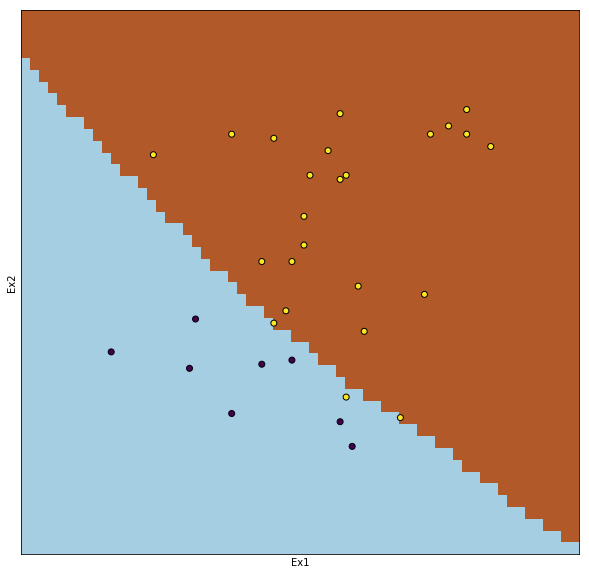

In [26]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(hidden_layer_sizes=(10),max_iter=500)
mlp.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=mlp.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### Ejemplo 2. Nnets aplicado a Diabetes

In [27]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [28]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [47]:
mlp.coefs_

[array([[ -5.23683481e-01,  -4.37988689e-01,   1.97091710e-01,
           1.97778427e-01,   5.40525944e-01,  -4.19530373e-01,
          -1.17017531e-01,   4.03922113e-01,  -2.83255092e-01,
          -1.62214027e-01,  -3.07677758e-01,   2.26908947e-01,
           3.58804750e-01,   3.33184718e-01,  -3.02391247e-01,
          -2.46521500e-02,  -1.17129364e-01,  -2.80810468e-01,
           1.40553922e-01,  -2.69665183e-01],
        [  1.22755283e-01,   2.42002659e-01,  -4.01051974e-01,
          -1.14798613e-01,   7.38084915e-01,  -4.84729661e-01,
          -2.95374161e-01,  -2.49986999e-01,  -2.46674141e-01,
          -2.18444879e-01,  -3.54979311e-01,  -2.40832392e-01,
           3.68873076e-02,   5.01826083e-01,  -3.99741531e-01,
          -2.17653621e-01,  -2.04572770e-01,  -6.58755125e-01,
          -5.27312653e-01,  -4.64342442e-01],
        [  3.45452847e-02,   9.68628123e-02,  -6.02084748e-02,
          -1.21500934e-01,  -9.65138091e-02,   5.11484728e-03,
           2.51332106e-01,

In [49]:
mlp.intercepts_

[array([-0.07124253,  0.31210969,  0.32062791,  0.22927053,  0.0514751 ,
         0.57154633, -0.13752334,  0.06180995,  0.30629036,  0.21964899,
        -0.13339402,  0.68050486,  0.2998381 ,  0.12943538, -0.23544417,
         0.12638207, -0.1295614 ,  0.56813622,  0.50539425, -0.49152074]),
 array([ 0.2220971])]

In [44]:
pred=mlp.predict(X_test)

In [45]:
mlp.score(X_test, y_test)

0.74479166666666663

In [40]:
print (classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.79      0.83      0.81       124
          2       0.66      0.60      0.63        68

avg / total       0.75      0.75      0.75       192



### Ejemplo 3. Nnet a  Landsat 

In [50]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
#Estimacion de la precision con k=3 vecinos  por el metodo  "holdout 
X_train, X_test, y_train, y_test = train_test_split(X, y)
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=500)
mlp.fit(X_train, y_train) 
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [55]:
pred=mlp.predict(X_test)
print(confusion_matrix(y_test, pred))

[[240   1   2   0   7   0]
 [  0 121   0   0   7   0]
 [  0   0 158  34   2  49]
 [  0   2  29  22   1  39]
 [  8   0   2   6  90  13]
 [  0   0  23  22   5 226]]


In [56]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.97      0.96      0.96       250
          2       0.98      0.95      0.96       128
          3       0.74      0.65      0.69       243
          4       0.26      0.24      0.25        93
          5       0.80      0.76      0.78       119
          6       0.69      0.82      0.75       276

avg / total       0.77      0.77      0.77      1109



### IV. Ejemplo de Deep Learning aplicado a Diabetes

In [57]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
h2o.init()
h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 2 mins
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.6
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_edgar2017_574tkv
H2O cluster total nodes:,1
H2O cluster free memory:,1.323 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [58]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=diabetes)

In [59]:
y_pred=dl_model.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))

0.825520833333


In [60]:
dl_model.model_performance(diabetes)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.119943996905
RMSE: 0.346329318575
LogLoss: 0.375134201402
Mean Per-Class Error: 0.172089552239
AUC: 0.902645522388
Gini: 0.805291044776
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.397354450096: 


,1,2,Error,Rate
1,410.0,90.0,0.18,(90.0/500.0)
2,44.0,224.0,0.1642,(44.0/268.0)
Total,454.0,314.0,0.1745,(134.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3973545,0.7697595,200.0
max f2,0.2030697,0.8454907,279.0
max f0point5,0.5981297,0.7784698,130.0
max accuracy,0.5465430,0.8333333,148.0
max precision,0.9992127,1.0,0.0
max recall,0.0149212,1.0,381.0
max specificity,0.9992127,1.0,0.0
max absolute_mcc,0.3973545,0.6358357,200.0
max min_per_class_accuracy,0.4039801,0.8208955,197.0
max mean_per_class_accuracy,0.3973545,0.8279104,200.0


Gains/Lift Table: Avg response rate: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9857534,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,0.9710113,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0597015,186.5671642,186.5671642
,3,0.03125,0.9646304,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0895522,186.5671642,186.5671642
,4,0.0403646,0.9572626,2.4562900,2.7732306,0.8571429,0.9677419,0.0223881,0.1119403,145.6289979,177.3230621
,5,0.0507812,0.9439911,2.5074627,2.7187141,0.875,0.9487179,0.0261194,0.1380597,150.7462687,171.8714122
,6,0.1002604,0.8832030,2.6394344,2.6795891,0.9210526,0.9350649,0.1305970,0.2686567,163.9434407,167.9589068
,7,0.1510417,0.8275848,2.1308840,2.4951107,0.7435897,0.8706897,0.1082090,0.3768657,113.0884041,149.5110654
,8,0.2005208,0.7198686,2.4886096,2.4935065,0.8684211,0.8701299,0.1231343,0.5,148.8609584,149.3506494
,9,0.3007812,0.5619742,1.8608257,2.2826129,0.6493506,0.7965368,0.1865672,0.6865672,86.0825741,128.2612909
,10,0.3997396,0.4072111,1.2820110,2.0349069,0.4473684,0.7100977,0.1268657,0.8134328,28.2010998,103.4906899


### V . Ejemplo de deep Learning aplicado a Shuttle

In [61]:
shuttle = h2o.import_file("https://academic.uprm.edu/eacuna/shuttle.trn")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9']
shuttle['C10']=shuttle['C10'].asfactor()
myy="C10"
dl_model = H2ODeepLearningEstimator(hidden=[10,20],epochs=200)
dl_model.train(myx, myy, training_frame=shuttle)

In [62]:
y_pred=dl_model.predict(shuttle)
print (y_pred['predict']==shuttle['C10']).sum()/float(len(shuttle))

0.998712643678


In [63]:
dl_model.model_performance(shuttle)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.00117967950514
RMSE: 0.0343464627748
LogLoss: 0.0132599836605
Mean Per-Class Error: 0.166253167789
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,7,Error,Rate
34103.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0001466,"5 / 34,108"
2.0,27.0,0.0,4.0,4.0,0.0,0.0,0.2702703,10 / 37
11.0,0.0,119.0,2.0,0.0,0.0,0.0,0.0984848,13 / 132
3.0,0.0,0.0,6742.0,2.0,1.0,0.0,0.0008892,"6 / 6,748"
4.0,3.0,1.0,3.0,2443.0,4.0,0.0,0.0061025,"15 / 2,458"
1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.3333333,2 / 6
3.0,0.0,2.0,0.0,0.0,0.0,6.0,0.4545455,5 / 11
34127.0,31.0,124.0,6752.0,2450.0,9.0,7.0,0.0012874,"56 / 43,500"


Top-7 Hit Ratios: 


k,hit_ratio
1,0.9987127
2,0.9994713
3,0.9997472
4,0.9997702
5,0.9998391
6,0.9999311
7,1.0000001


In [64]:
dl_model.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1525981299314_1188


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.00188648644817
RMSE: 0.0434337017553
LogLoss: 0.028081436406
Mean Per-Class Error: 0.200869604704
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,7,Error,Rate
7775.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0002572,"2 / 7,777"
0.0,7.0,0.0,1.0,1.0,0.0,0.0,0.2222222,2 / 9
2.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0689655,2 / 29
3.0,0.0,0.0,1520.0,1.0,1.0,0.0,0.0032787,"5 / 1,525"
2.0,0.0,1.0,1.0,522.0,2.0,0.0,0.0113636,6 / 528
0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5,1 / 2
1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.6,3 / 5
7783.0,8.0,31.0,1523.0,524.0,4.0,2.0,0.0021266,"21 / 9,875"


Top-7 Hit Ratios: 


k,hit_ratio
1,0.9978734
2,0.9985823
3,0.9991899
4,0.9991899
5,0.9994937
6,0.9996962
7,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error
,2018-05-10 16:44:27,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2018-05-10 16:44:28,0.683 sec,187524 obs/sec,2.3020230,1,100138.0,0.0859281,0.0729544,0.0066835
,2018-05-10 16:44:33,5.870 sec,227982 obs/sec,29.8788506,13,1299730.0,0.0533952,0.0515509,0.0031392
,2018-05-10 16:44:39,11.365 sec,224164 obs/sec,57.4376092,25,2498536.0,0.0489833,0.0417818,0.0026329
,2018-05-10 16:44:44,16.465 sec,227927 obs/sec,85.0301609,37,3698812.0,0.0448518,0.0321364,0.0021266
,2018-05-10 16:44:49,21.708 sec,228365 obs/sec,112.6131494,49,4898672.0,0.0434337,0.0280814,0.0021266
,2018-05-10 16:44:54,26.945 sec,228666 obs/sec,140.1909195,61,6098305.0,0.0458211,0.0305809,0.0025316
,2018-05-10 16:44:59,32.195 sec,228789 obs/sec,167.7998161,73,7299292.0,0.0438900,0.0381255,0.0021266
,2018-05-10 16:45:05,37.443 sec,228899 obs/sec,195.3854483,85,8499267.0,0.0424593,0.0382719,0.0019241
,2018-05-10 16:45:06,38.764 sec,228941 obs/sec,202.2842299,88,8799364.0,0.0435229,0.0313514,0.0019241


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C2,1.0,1.0,0.1696334
C1,0.9006099,0.9006099,0.1527735
C9,0.8869020,0.8869020,0.1504482
C5,0.7040607,0.7040607,0.1194322
C8,0.5886161,0.5886161,0.0998490
C7,0.5656106,0.5656106,0.0959465
C4,0.4704952,0.4704952,0.0798117
C3,0.4180541,0.4180541,0.0709159
C6,0.3607157,0.3607157,0.0611894


<bound method ?.confusion_matrix of >